In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import time
%matplotlib notebook 
# For plotting. Don't include this if you submit
                     # a Jupyter Notebook to Gradescope.

In [2]:
def forward_euler(odefun, tspan, y0):
    # Forward Euler method
    # Solves the differential equation y' = f(t,y) at the times
    # specified by the vector tspan and with initial condition y0.
    # - odefun is an anonymous function of the form odefun = lambda t,v: ...
    # - tspan is a 1D array
    # - y0 is a number

    dt = tspan[1] - tspan[0]  # calculate dt from t values
    y = np.zeros(len(tspan))  # Create array of same length as tspan
    y[0] = y0  # Set initial condition
    for k in range(len(y) - 1):
        y[k + 1] = y[k] + dt * odefun(tspan[k], y[k]) # Forward Euler step

    return tspan, y # return two things

def backward_euler(odefun, tspan, y0):
    # Backward Euler method
    # Solves the differential equation y' = f(t,y) at the times
    # specified by the vector tspan and with initial condition y0.
    # - odefun is an anonymous function of the form odefun = lambda t,v: ...
    # - tspan is a 1D array
    # - y0 is a number
    
    dt = tspan[1] - tspan[0]  # calculate dt from t values
    y = np.zeros(len(tspan))  # Create array of same length as tspan
    y[0] = y0  # Set initial condition
    
    for k in range(len(y) - 1):
        g = lambda z: z - y[k] - dt*odefun(tspan[k+1], z) # Implicit equation
        y[k+1] = scipy.optimize.fsolve(g, y[k]) # Defines y[k+1]

    return tspan, y

### Stability
The definition and study of *stability* is a complicated one. Unfortunately, this means that I am also using somewhat non-standard definitions of words like "stable" and "unstable".  If you are interested in the standard definitions, a good place to start is by looking up "A-stability".  

We are not going to go into the details. Very roughly, we will say that a differential equation solver is *unstable* if the numerical solution *blows up* or goess off to infinity as $t\to \infty$. If this does not happen, we call the ODE solver *stable*.  

Let's think about the IVP we were trying to solve above, 
$$ 
\begin{align*}
y(t) &= (5\times 10^5)\times( - y + \sin(t)), ~ 0 \leq t \leq 2\pi \\ 
y(0) &= 0.
\end{align*}
$$
We are going to plot the vector field for this differential equation, using `quiver`.

To study what is happening, we changed the problem to one that is less stiff.
$$ y'(t) = 10 (-y + \sin(t)), $$
we get the following figure.

<IPython.core.display.Javascript object>


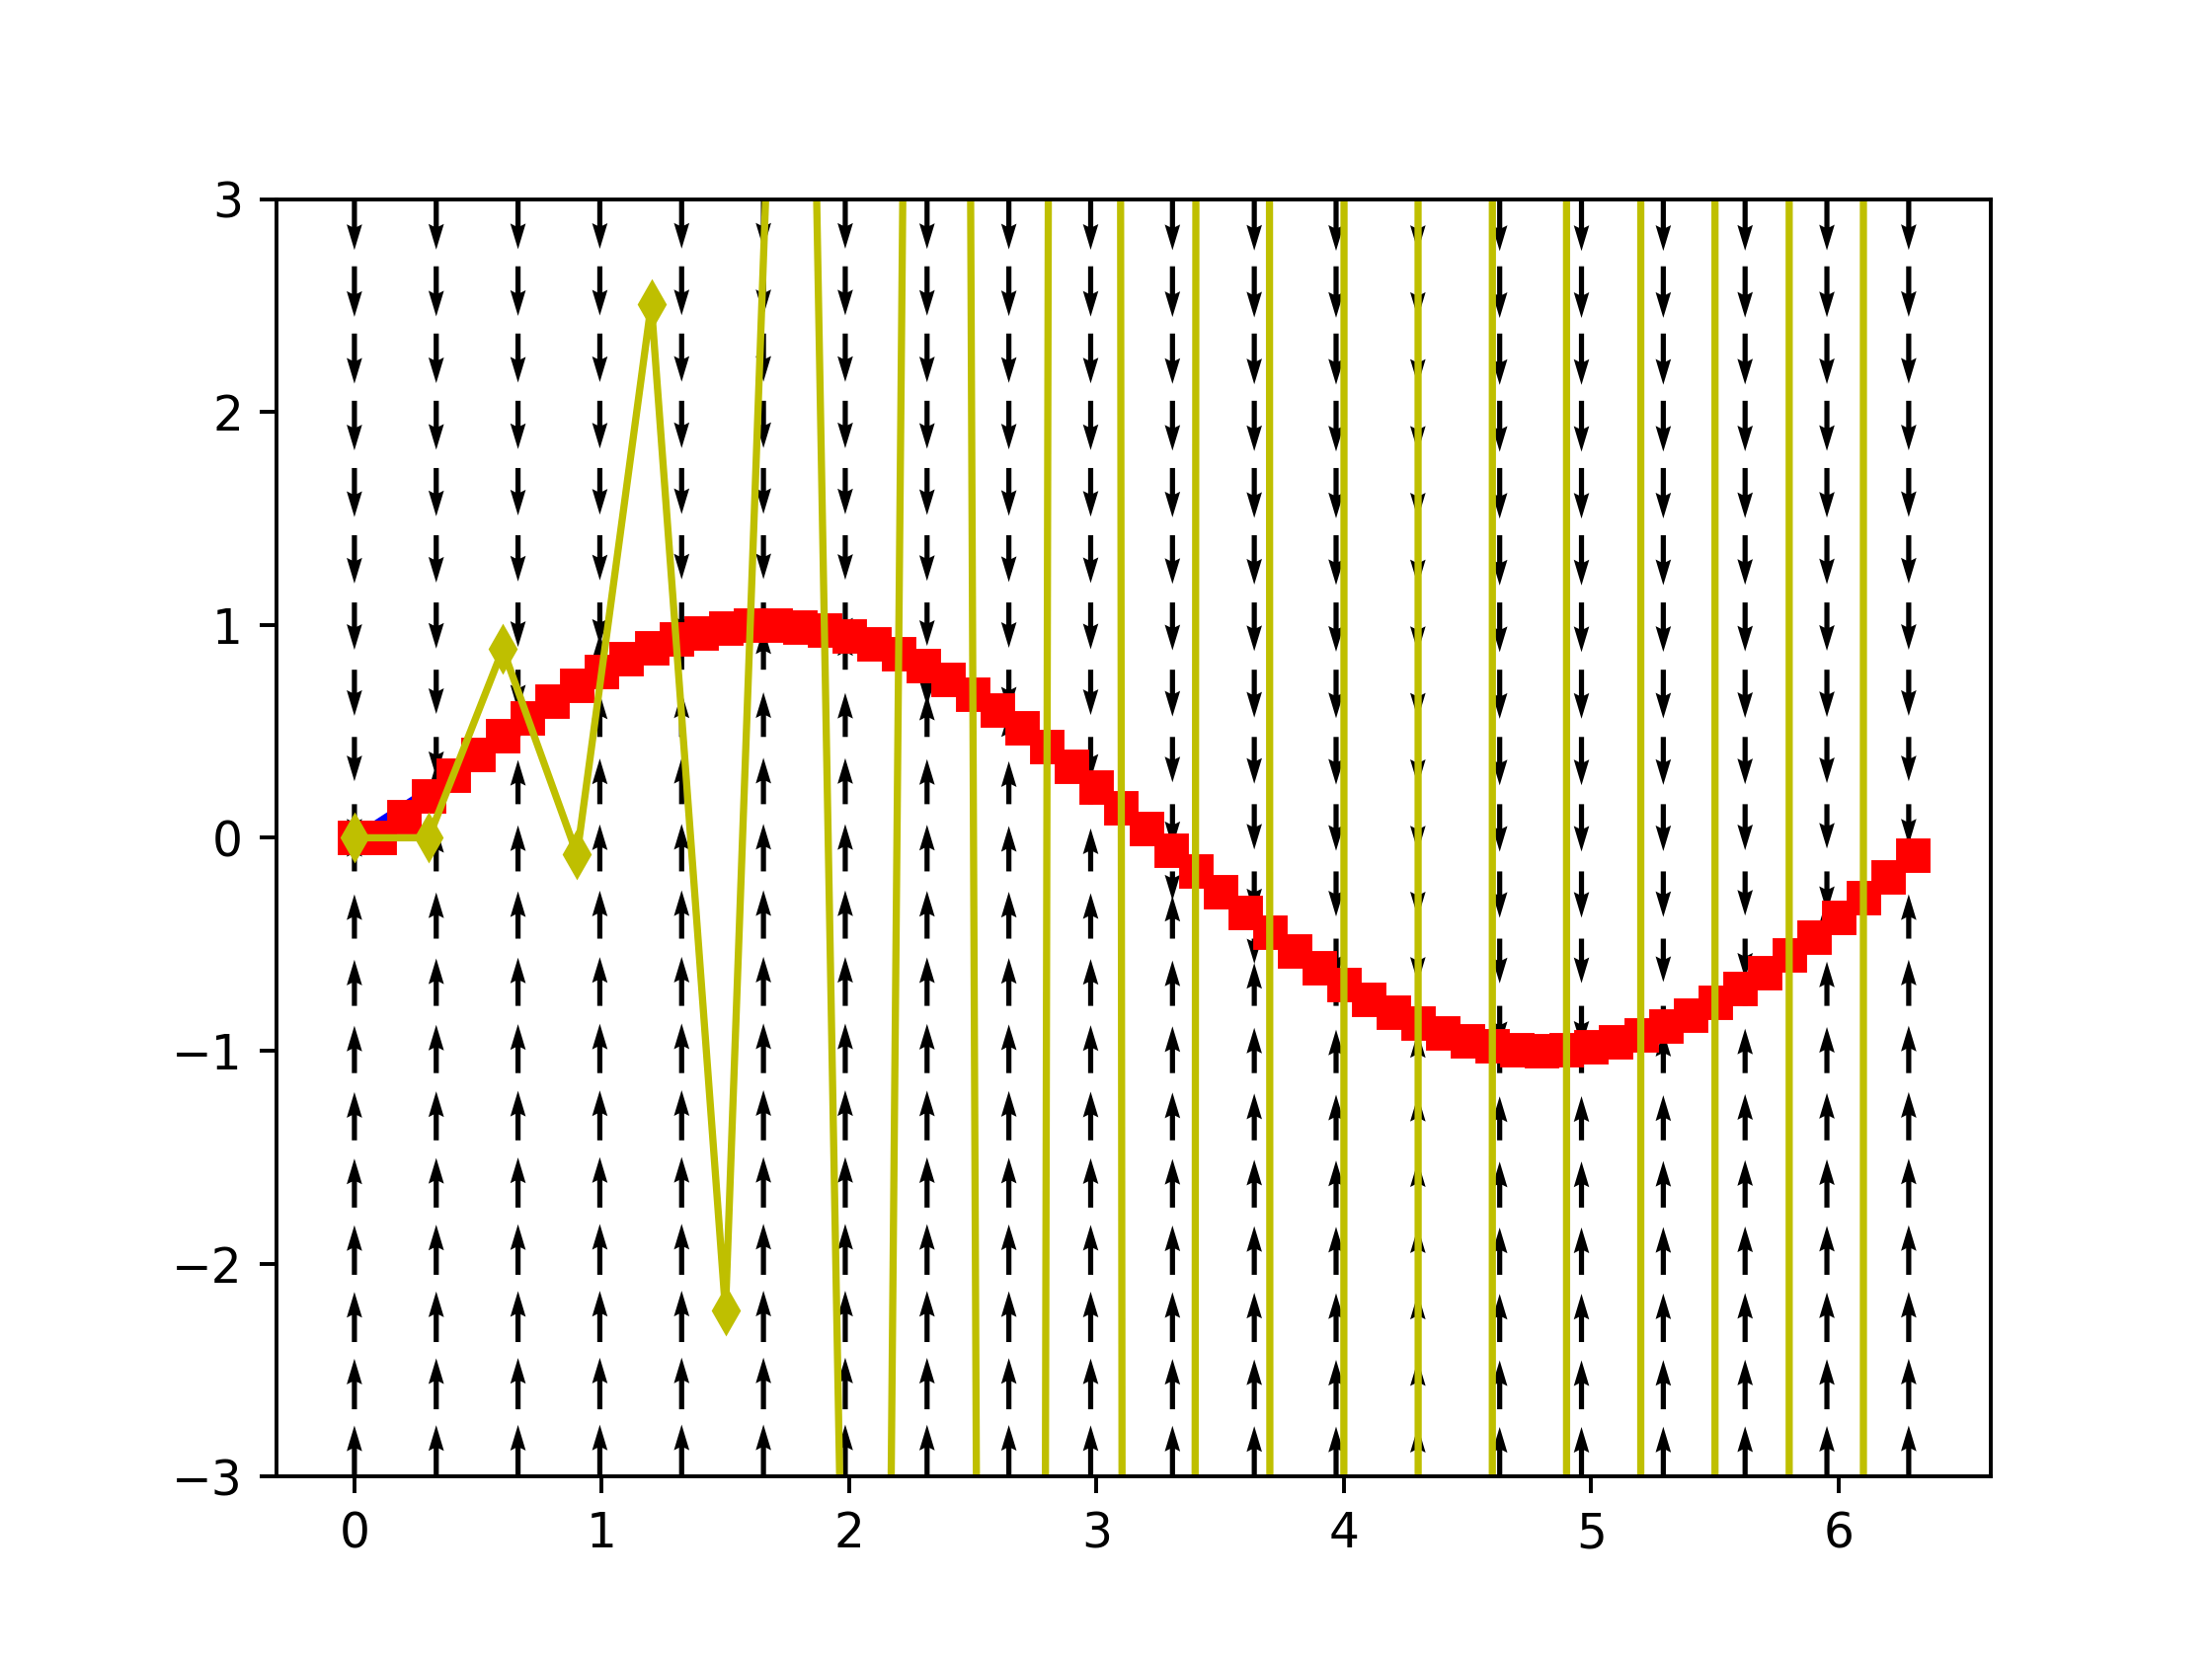

In [3]:
# Do all of the same steps as above, except with the constant = 10
# Setup new figure
fig3, ax3 = plt.subplots()
# Create tspan and yspan for the vector field plot. Use 20 equally spaced points in both directions.
# tspan should go from 0 to 2*pi, yspan should go from -3 to 3
tspan = np.linspace(0, 2*np.pi, 20)
yspan = np.linspace(-3, 3, 20)
# Create the meshgrid
T, Y = np.meshgrid(tspan, yspan)
# Define the new ODE, dydt
dydt = lambda t, y: 10*(-y+np.sin(t))
y0 = 0
# Plot using quiver
### I've added in the following code to make the vector field look more clear
u = np.ones(T.shape)
v = 5e5*(-Y + np.sin(T))
nn = np.sqrt(np.power(u,2) + np.power(v,2))
u = T/nn*np.log(1+nn)
v = v/nn*np.log(1+nn)
### You don't need to know how the above steps work.
ax3.quiver(T, Y, u, v)

# Calculate the solution using Backward Euler
t, BE_ans = backward_euler(dydt, tspan, y0)
# Then plot the solution in blue. 
ax3.plot(t, BE_ans, 'b-')

Away from the solution, the slopes on the slope field are even more close to being vertical. The region around the exact solution where the arrows curve in toward the direction of the solution is thinner. So there is a region (near the solution) where the slope field changes very rapidly. **This is what makes a problem stiff.** If you go back to the case with the constant 5e5, the region around the exact solution where the slopes curve in is so small that we can’t even see it. That’s what makes this such a stiff problem.

Let's continue to work with this ODE, $y'(t) = 10 (-y + \sin(t)),$ to see what happens with Forward Euler. We saw that for $\Delta t$ small enough the solution converged (we got some small error). So let's choose a small $\Delta t$ and see what happens with the solution.

We will choose $\Delta t = 0.1$ and solve below. 

<IPython.core.display.Javascript object>


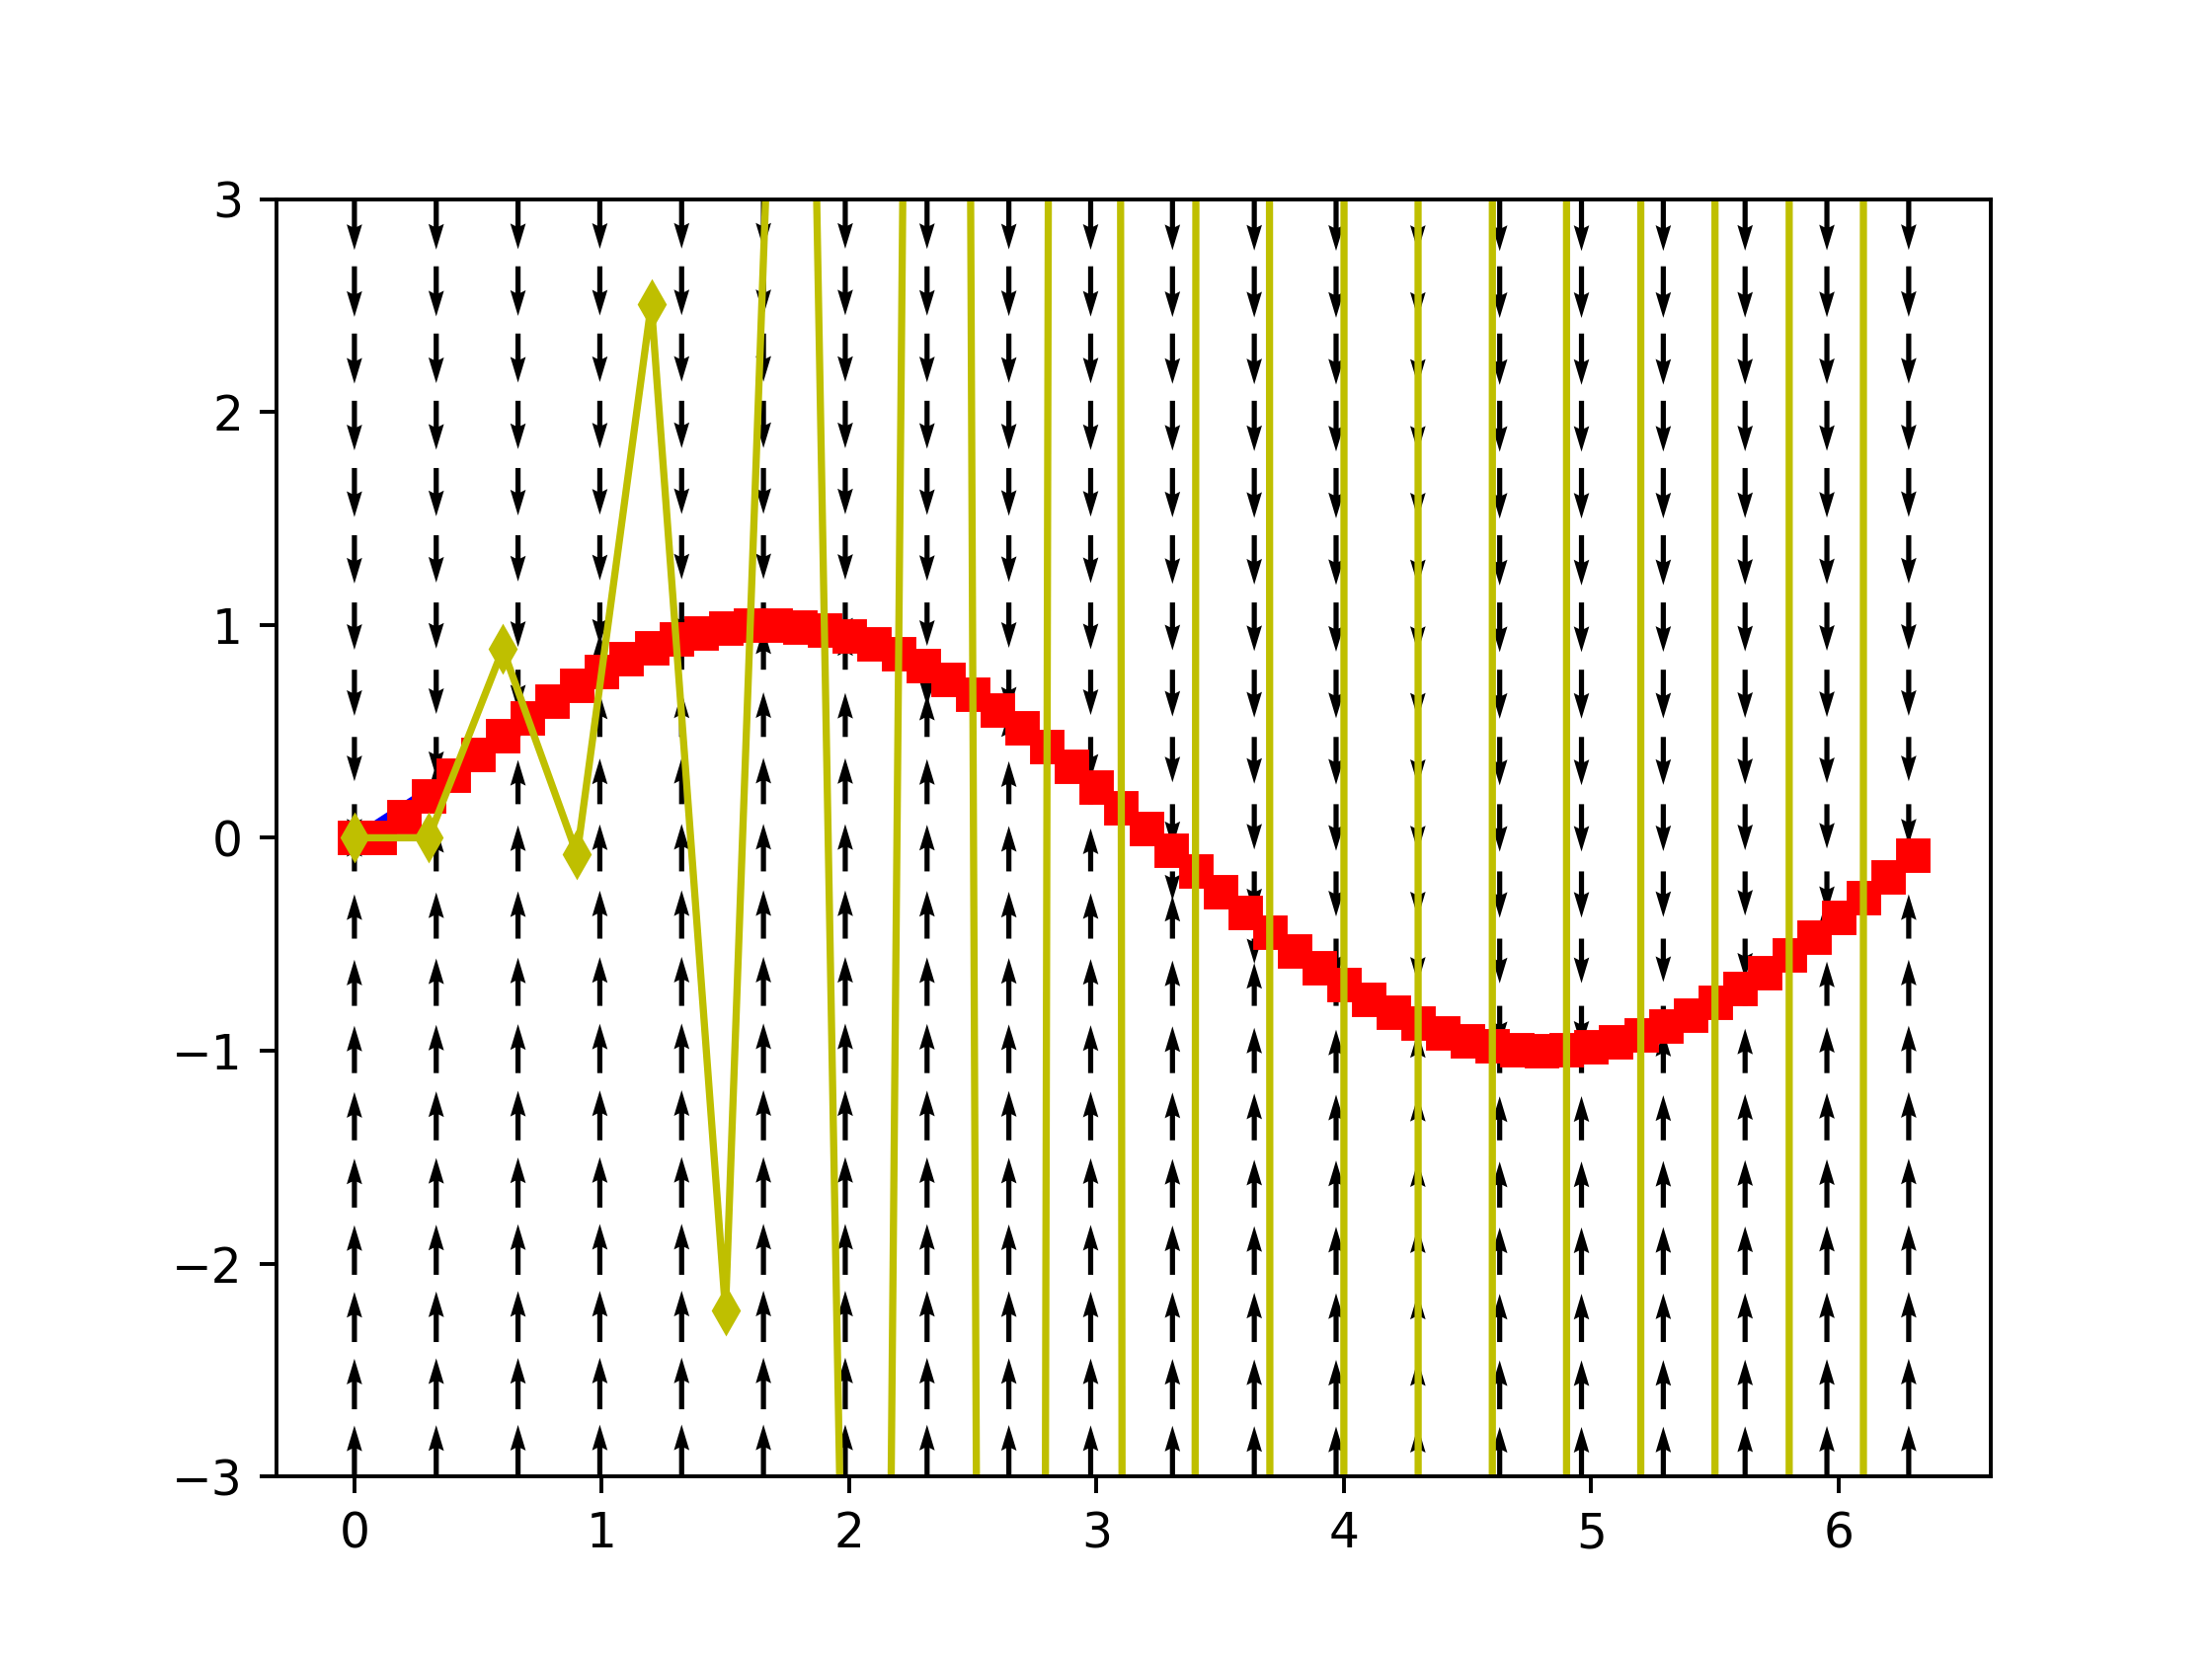

In [4]:
# Set dt
dt = 0.1
# Create the new tspan, from 0 to 2 pi with this dt
tspan = np.arange(0, 2*np.pi+dt, dt)
# Solve with Forward Euler
t, FE_ans = forward_euler(dydt, tspan, y0)
# Plot the solution using red squares
ax3.plot(t, FE_ans, 'rs-')

# Show the figure
fig3

We can see that the Forward-Euler solution matches up. What if we choose $\Delta t = 0.3$?

Let's solve with $\Delta t = 0.3$ and plot with yellow diamonds.

<IPython.core.display.Javascript object>


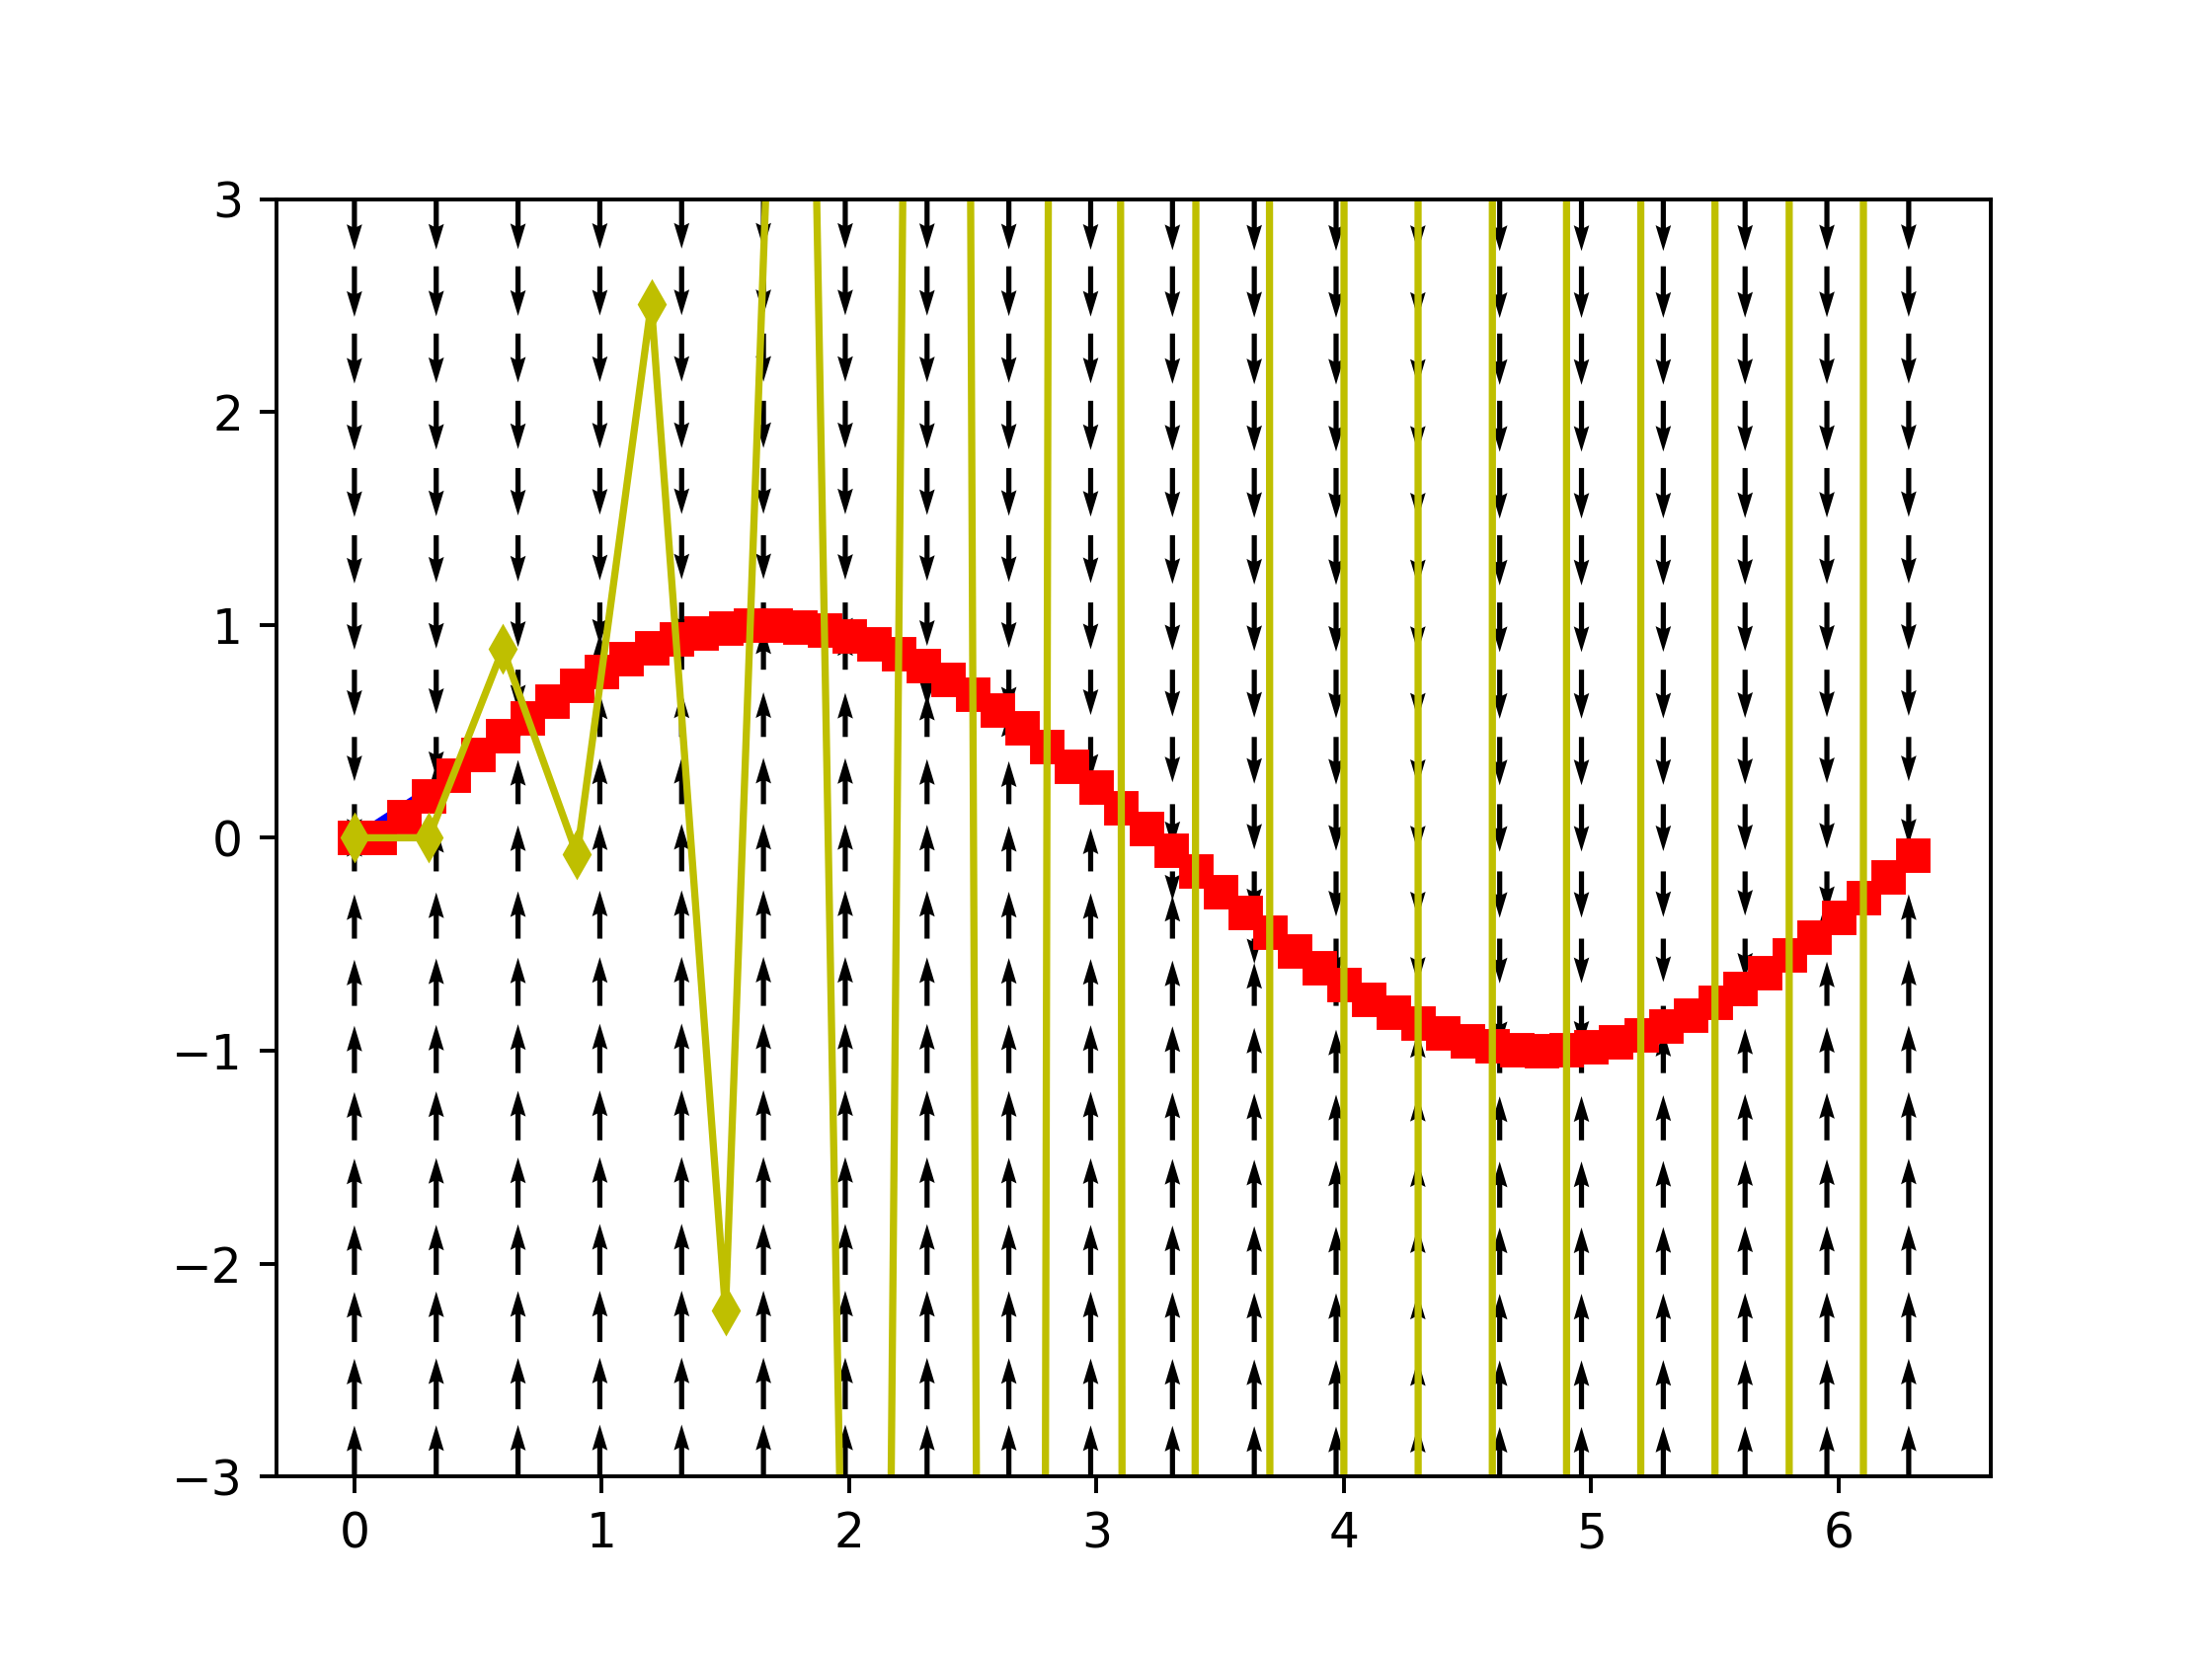

In [5]:
# Set dt
dt = 0.3
# Create the new tspan, from 0 to 2 pi with this dt
tspan = np.arange(0, 2*np.pi+dt, dt)
# Solve with Forward Euler
t, FE_ans = forward_euler(dydt, tspan, y0)
# Plot the solution using yellow diamonds
ax3.plot(t, FE_ans, 'yd-')

ax3.set_ylim([-3, 3]) # We are going to fix the ylimit.

# Show the figure
fig3

In [6]:
print(FE_ans)

[ 0.00000000e+00  0.00000000e+00  8.86560620e-01 -7.91938198e-02
  2.50836837e+00 -2.22061948e+00  7.43372392e+00 -1.19459049e+01
  2.64814380e+01 -5.09364864e+01  1.03155113e+02 -2.05886865e+02
  4.11300493e+02 -8.23928547e+02  1.64579380e+03 -3.29420232e+03
  6.58547205e+03 -1.31739326e+04  2.63450877e+04 -5.26924938e+04
  1.05383335e+05 -2.10767509e+05]


We can see that the solution is blowing up! There's some error in the first step, then some more error, then more and more etc. **This is numerical instability.**

Forward Euler becomes unstable because there is some error after the first step. Because you are not right on the curve after the first step, the slope field is relatively steep, causing an overshoot. Then the successive overshoots take you to regions where the slope field is even steeper. It is easy to see why this would be an even bigger problem using the constant 5e5 because almost all of the slopes on the slope field are nearly vertical. Even a small error off of the exact solution takes you to a region with a very steep slope in the opposite direction.

Why does this not happen for Backward Euler? To see that, let's remind ourselves of the basic picture for Forward and Backward Euler.

<div>
<img src="FE.png" alt="Forward Euler" style="width: 200px;"/><img src="BE.png" alt="Backward Euler" style="width: 200px;"/>
</div>

Forward Euler uses the information **at $t_k$** to say what is going to happen at $t_{k+1}$. It has no care in the world about the information at $t_{k+1}$. Backward Euler avoids this problem because it traces backward along the slope field. It can never end up in a region with nearly vertical slopes because if you trace any of them backward, you don’t end up near the exact solution. But *every explicit method will have this problem.* 

Let's visualize this by looking at 1 step of Backward Euler at a time.

<IPython.core.display.Javascript object>


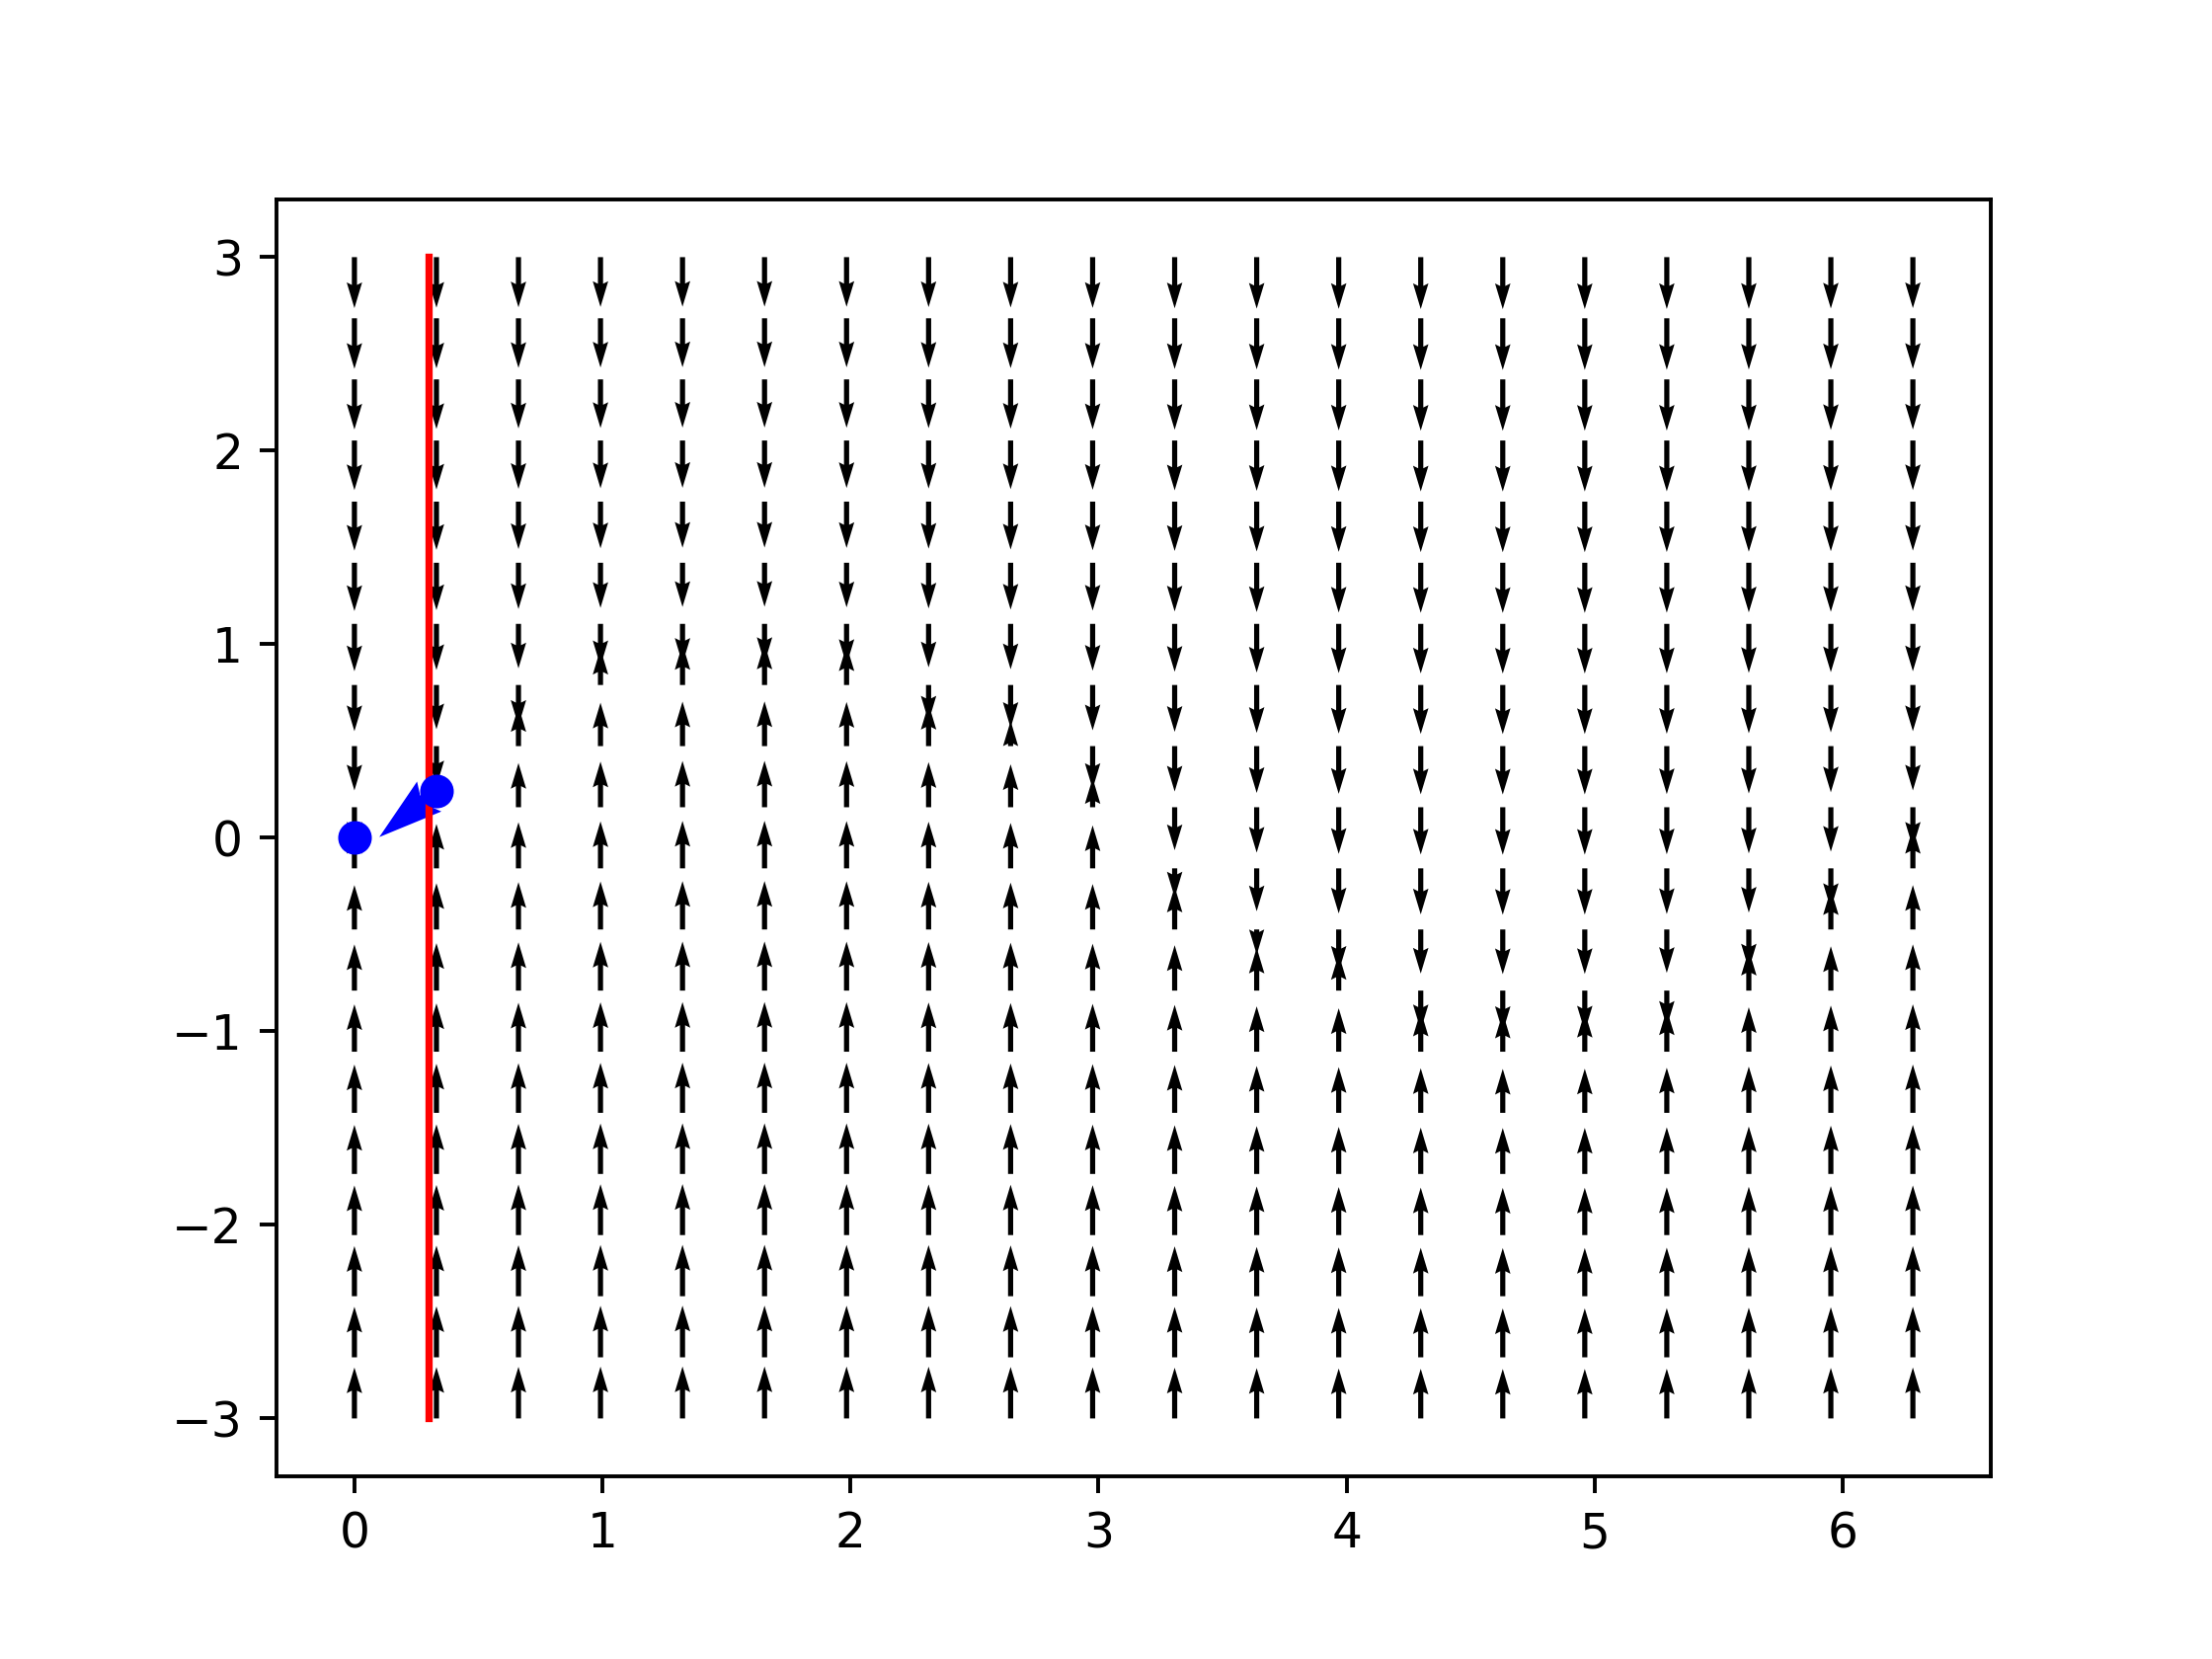

In [7]:
# Setup the figure again, start from scratch.
# Do all of the same steps as above, except with the constant = 10
# Setup new figure
fig, ax = plt.subplots()
# Create tspan and yspan for the vector field plot. Use 20 equally spaced points in both directions.
# tspan should go from 0 to 2*pi, yspan should go from -3 to 3
tspan = np.linspace(0, 2*np.pi, 20)
yspan = np.linspace(-3, 3, 20)
# Create the meshgrid
T, Y = np.meshgrid(tspan, yspan)
# Define the new ODE, dydt
dydt = lambda t, y: 10*(-y+np.sin(t))
# Plot using quiver
### I've added in the following code to make the vector field look more clear
u = np.ones(T.shape)
v = 5e5*(-Y + np.sin(T))
nn = np.sqrt(np.power(u,2) + np.power(v,2))
u = T/nn*np.log(1+nn)
v = v/nn*np.log(1+nn)
### You don't need to know how the above steps work.
ax.quiver(T, Y, u, v)

<IPython.core.display.Javascript object>


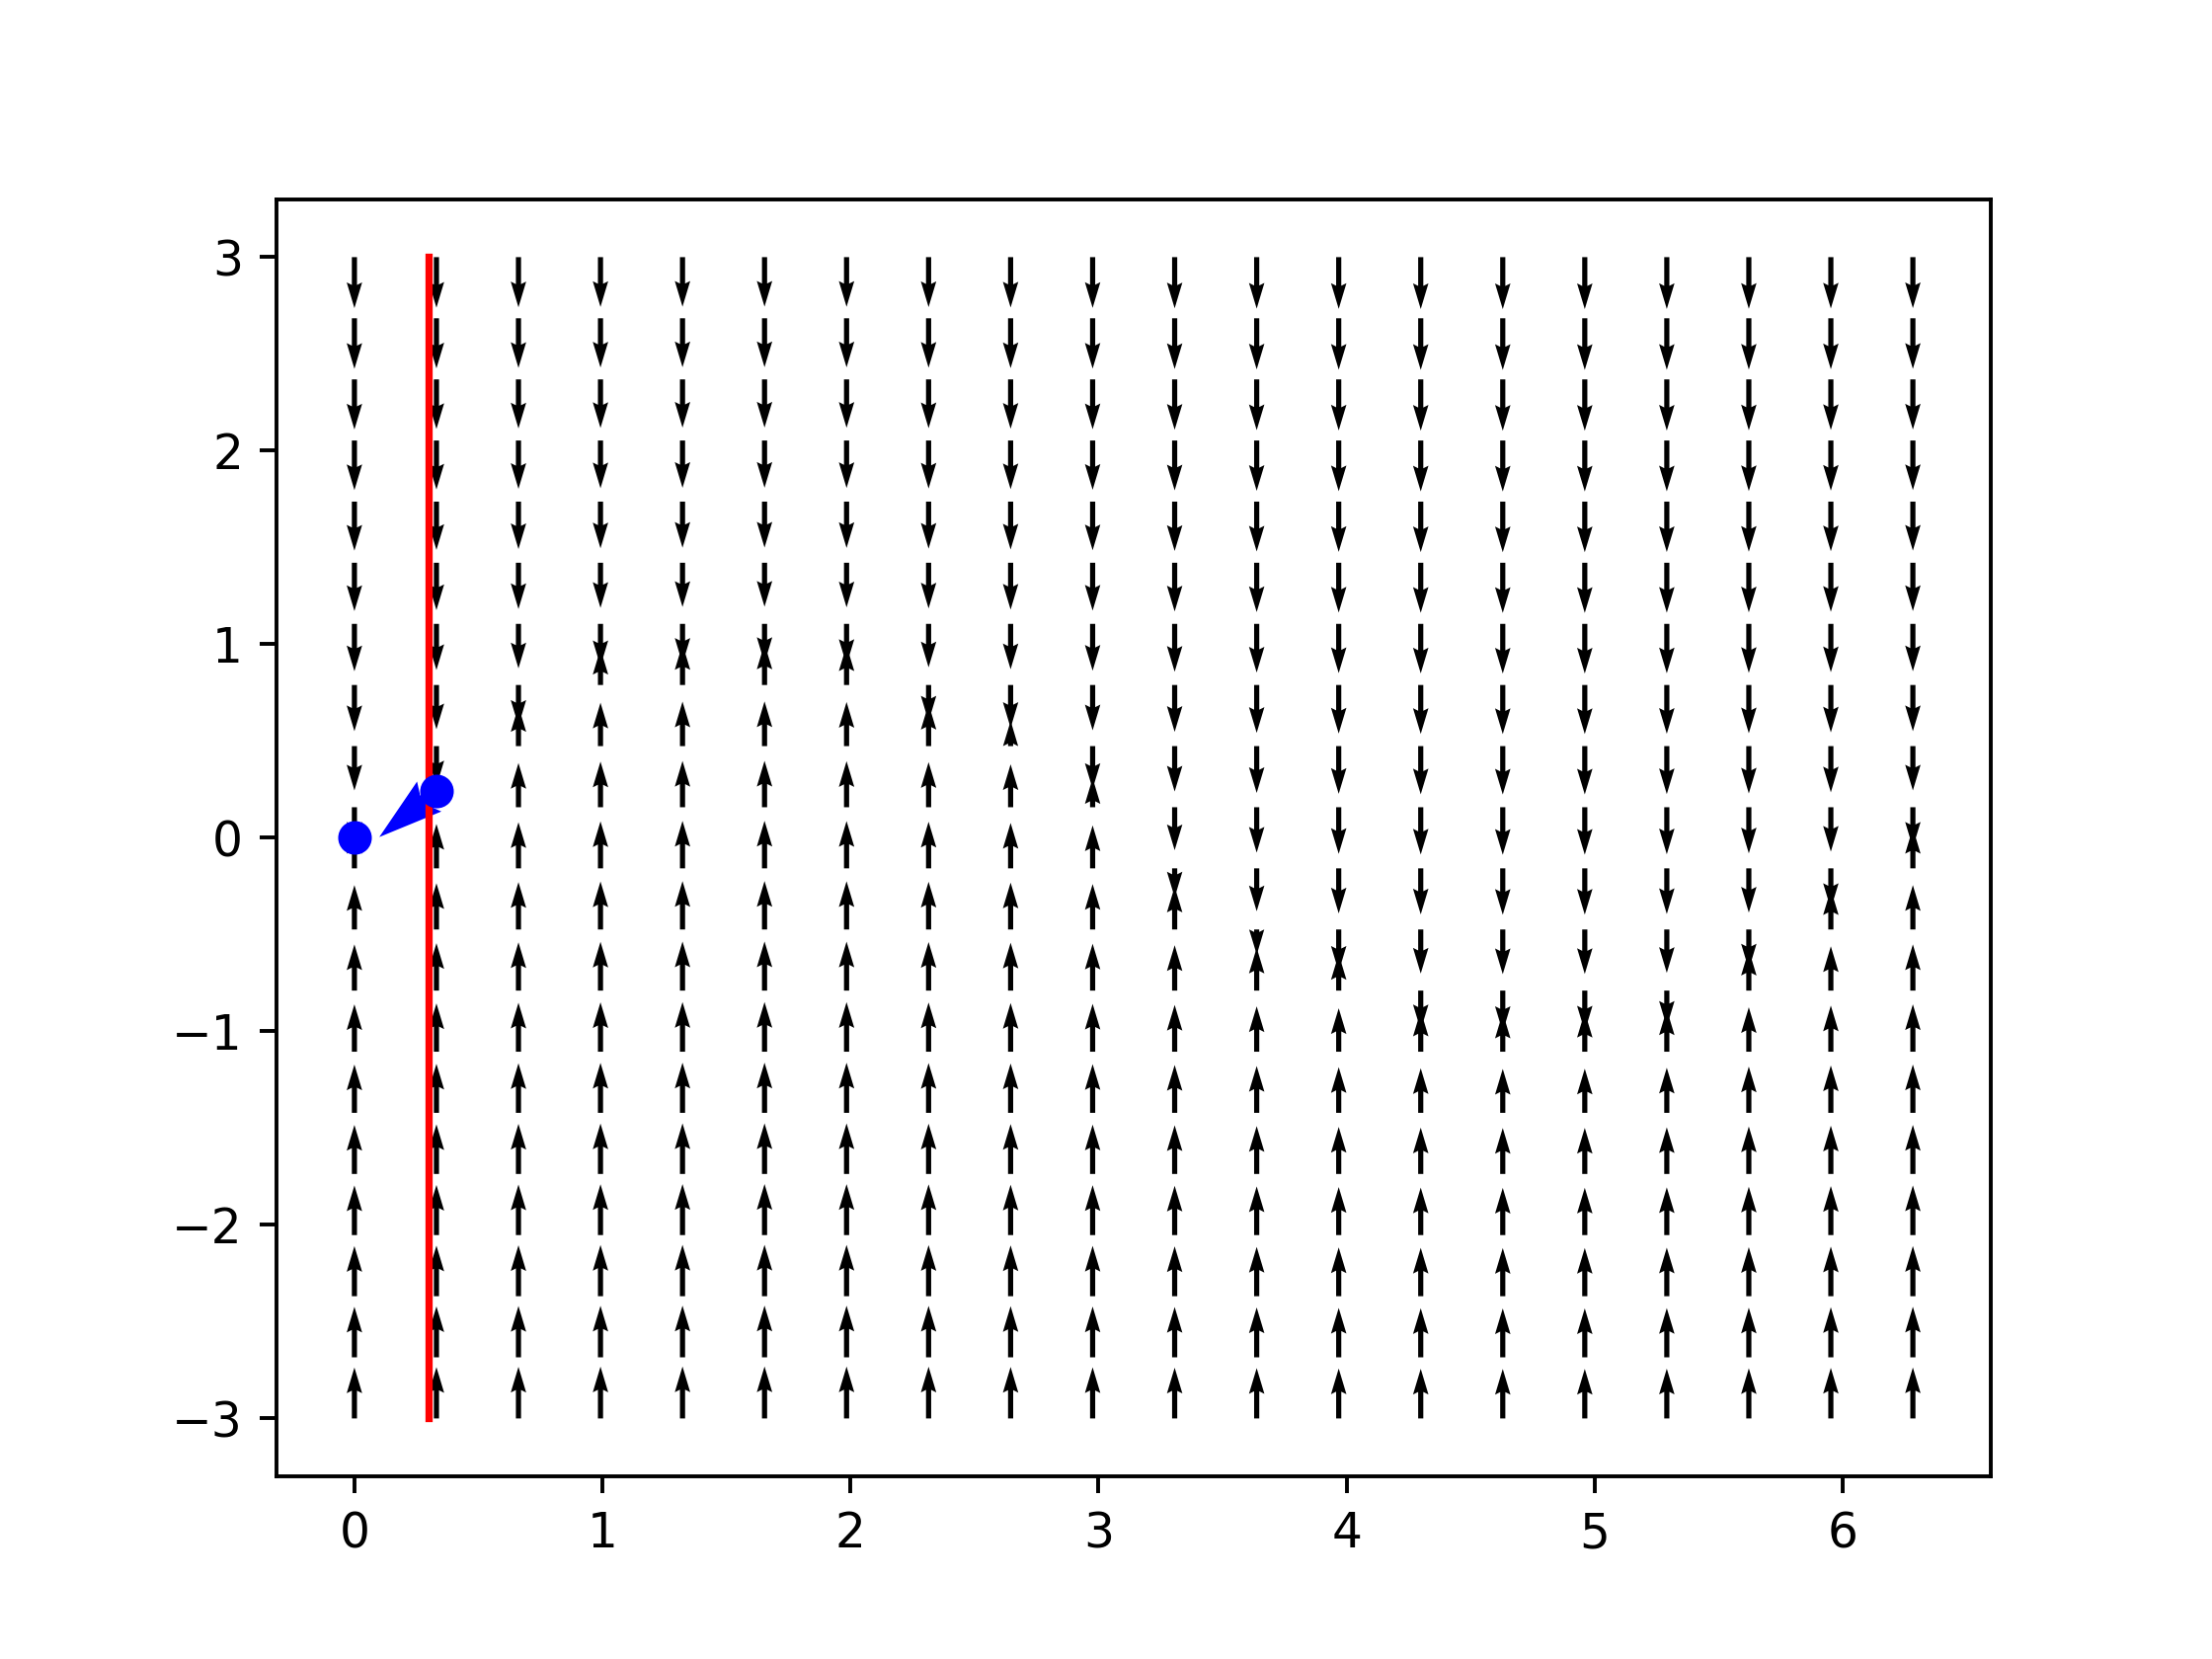

In [8]:
# Plot the initial condition
y0 = 0
ax.plot(0, y0, 'bo')

# show the figure
fig

Now let's calculate the first iteration using dt = 0.3 (for which Forward Euler was unstable). I will draw a line at $t = dt = 0.3$. This is the $t$ value at which we will search (solve for) the $y_1$ such that the slope at $t=dt=0.3$ traced backward in time leads to $y_0$. 

<IPython.core.display.Javascript object>


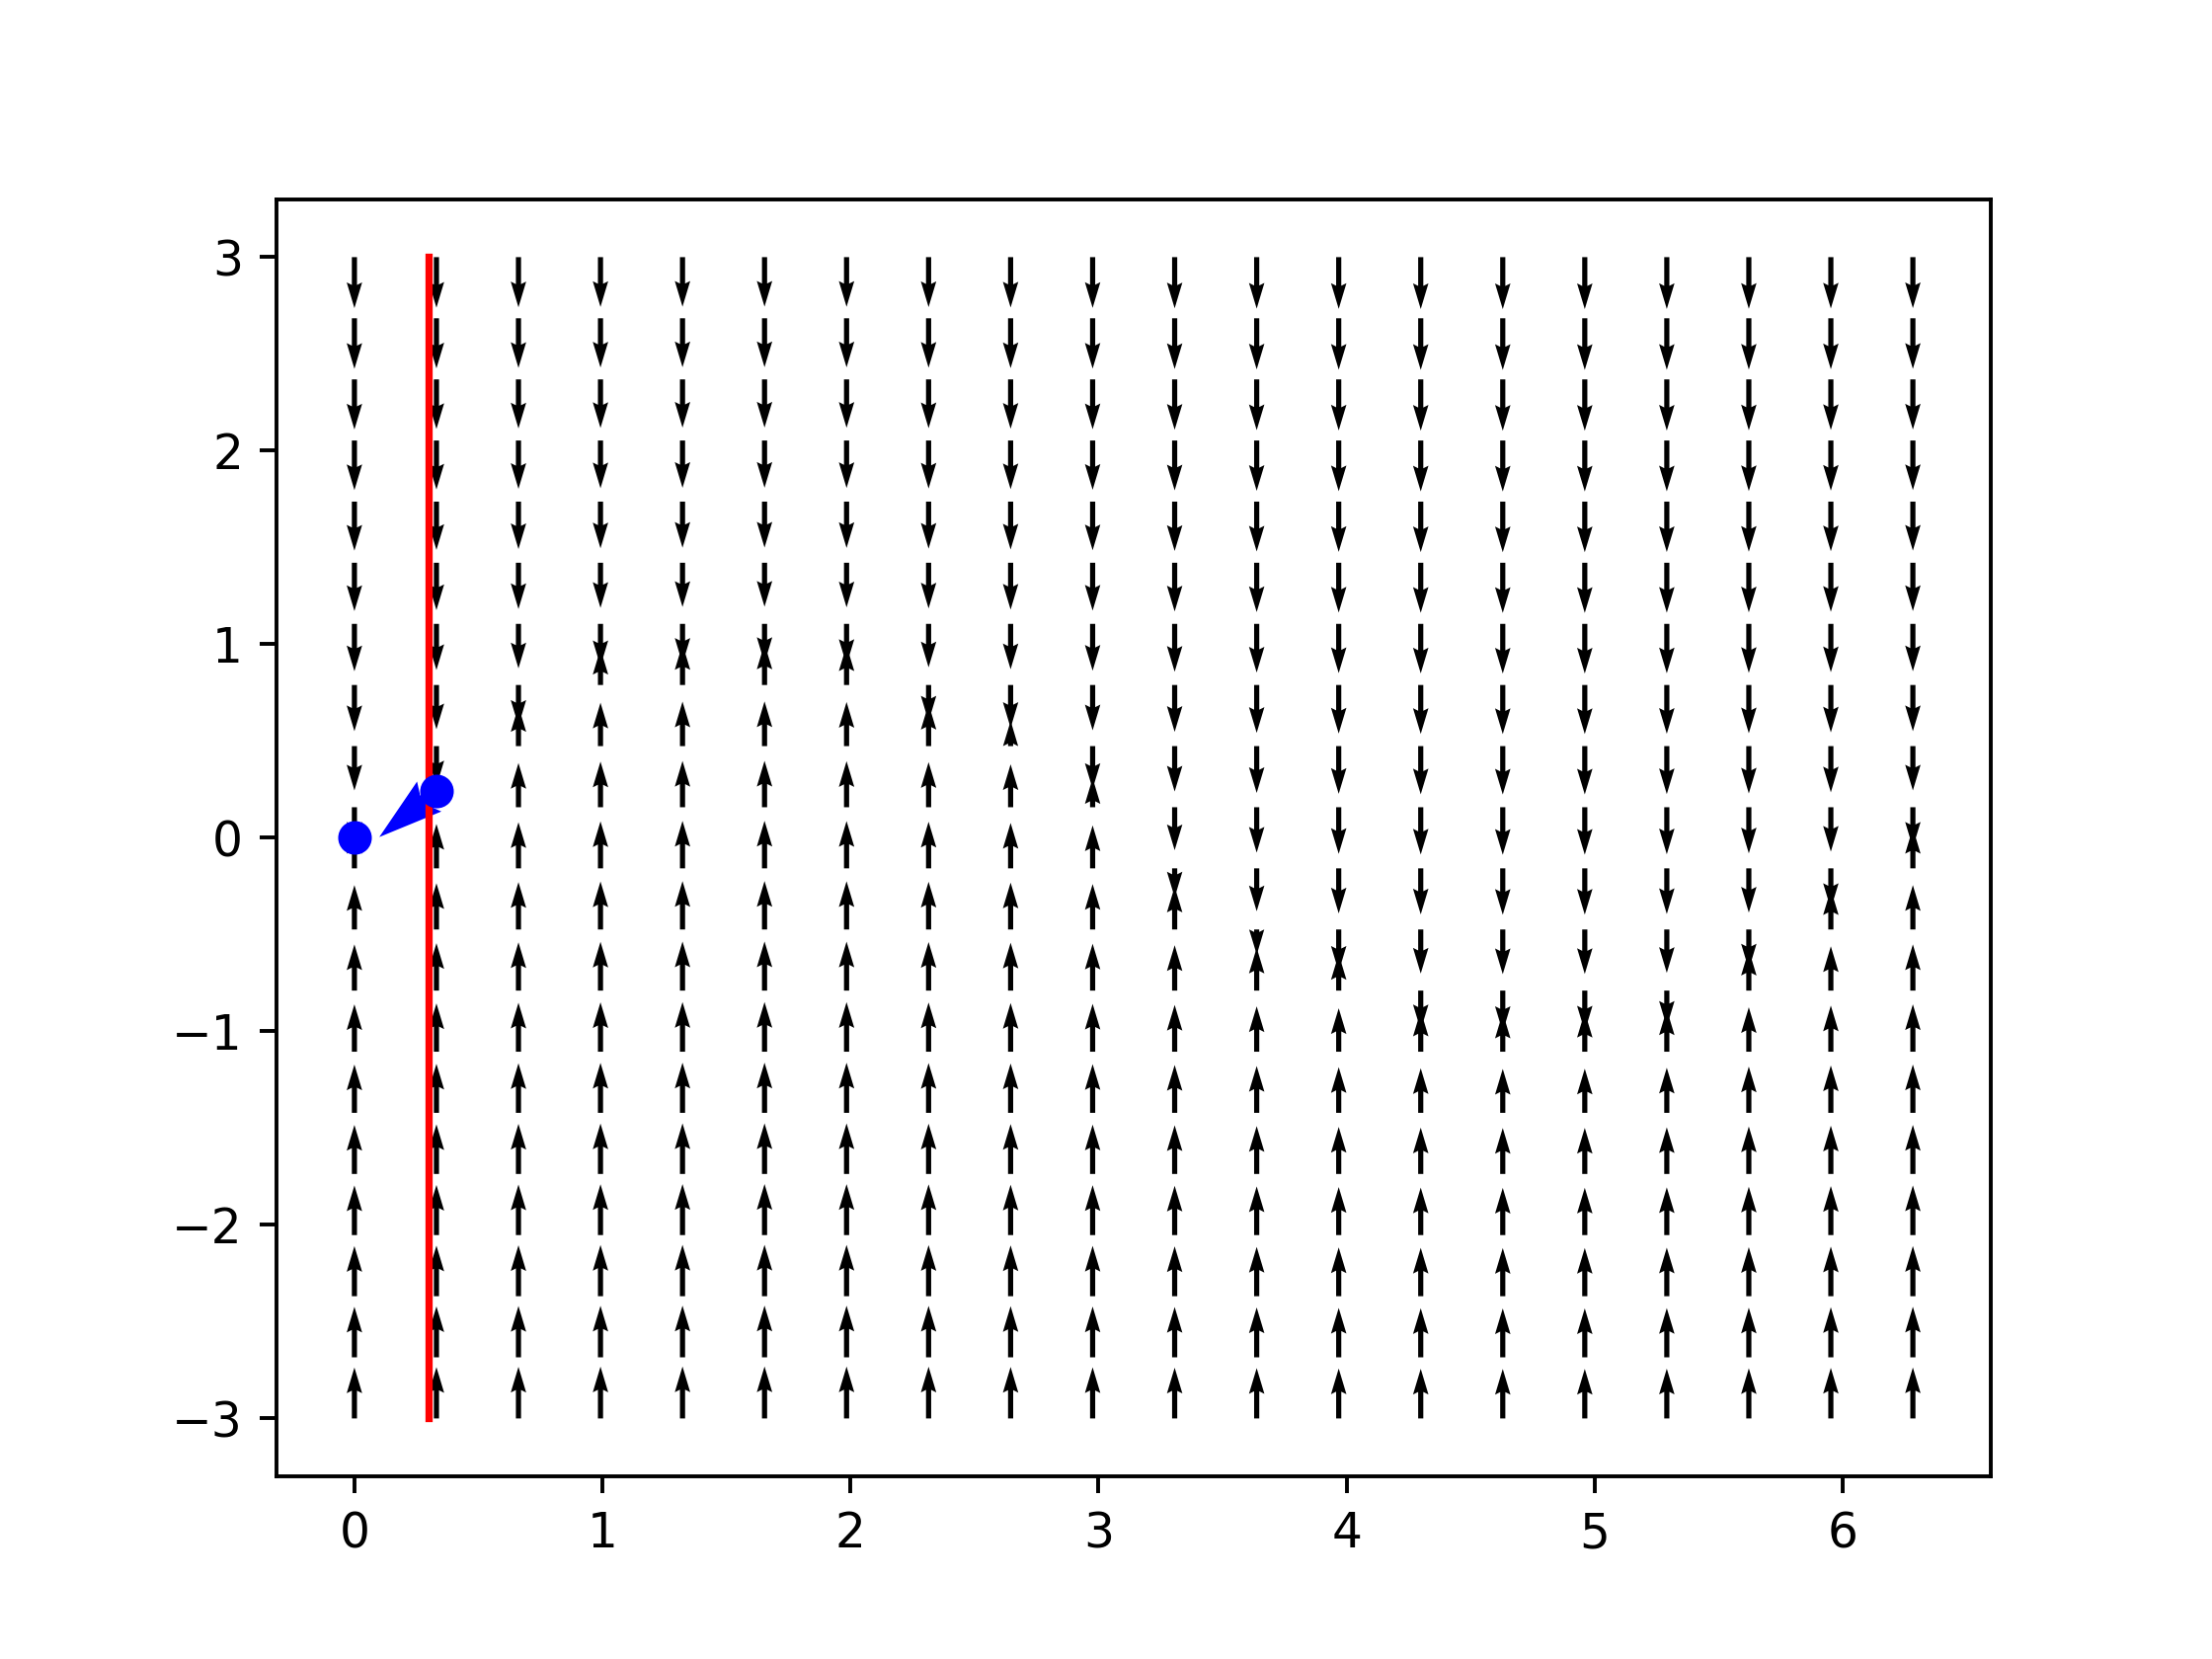

In [9]:
# Draw the vertical red line: horizontal values both equal dt, vertical values go from -3 to 3
ax.plot([dt, dt], [-3, 3], 'r') 

fig

If we look at those values, we can see that most of them point straight up or down. **We will never end up in that region. Instead, we will select something in the middle that points to the left.**

<IPython.core.display.Javascript object>


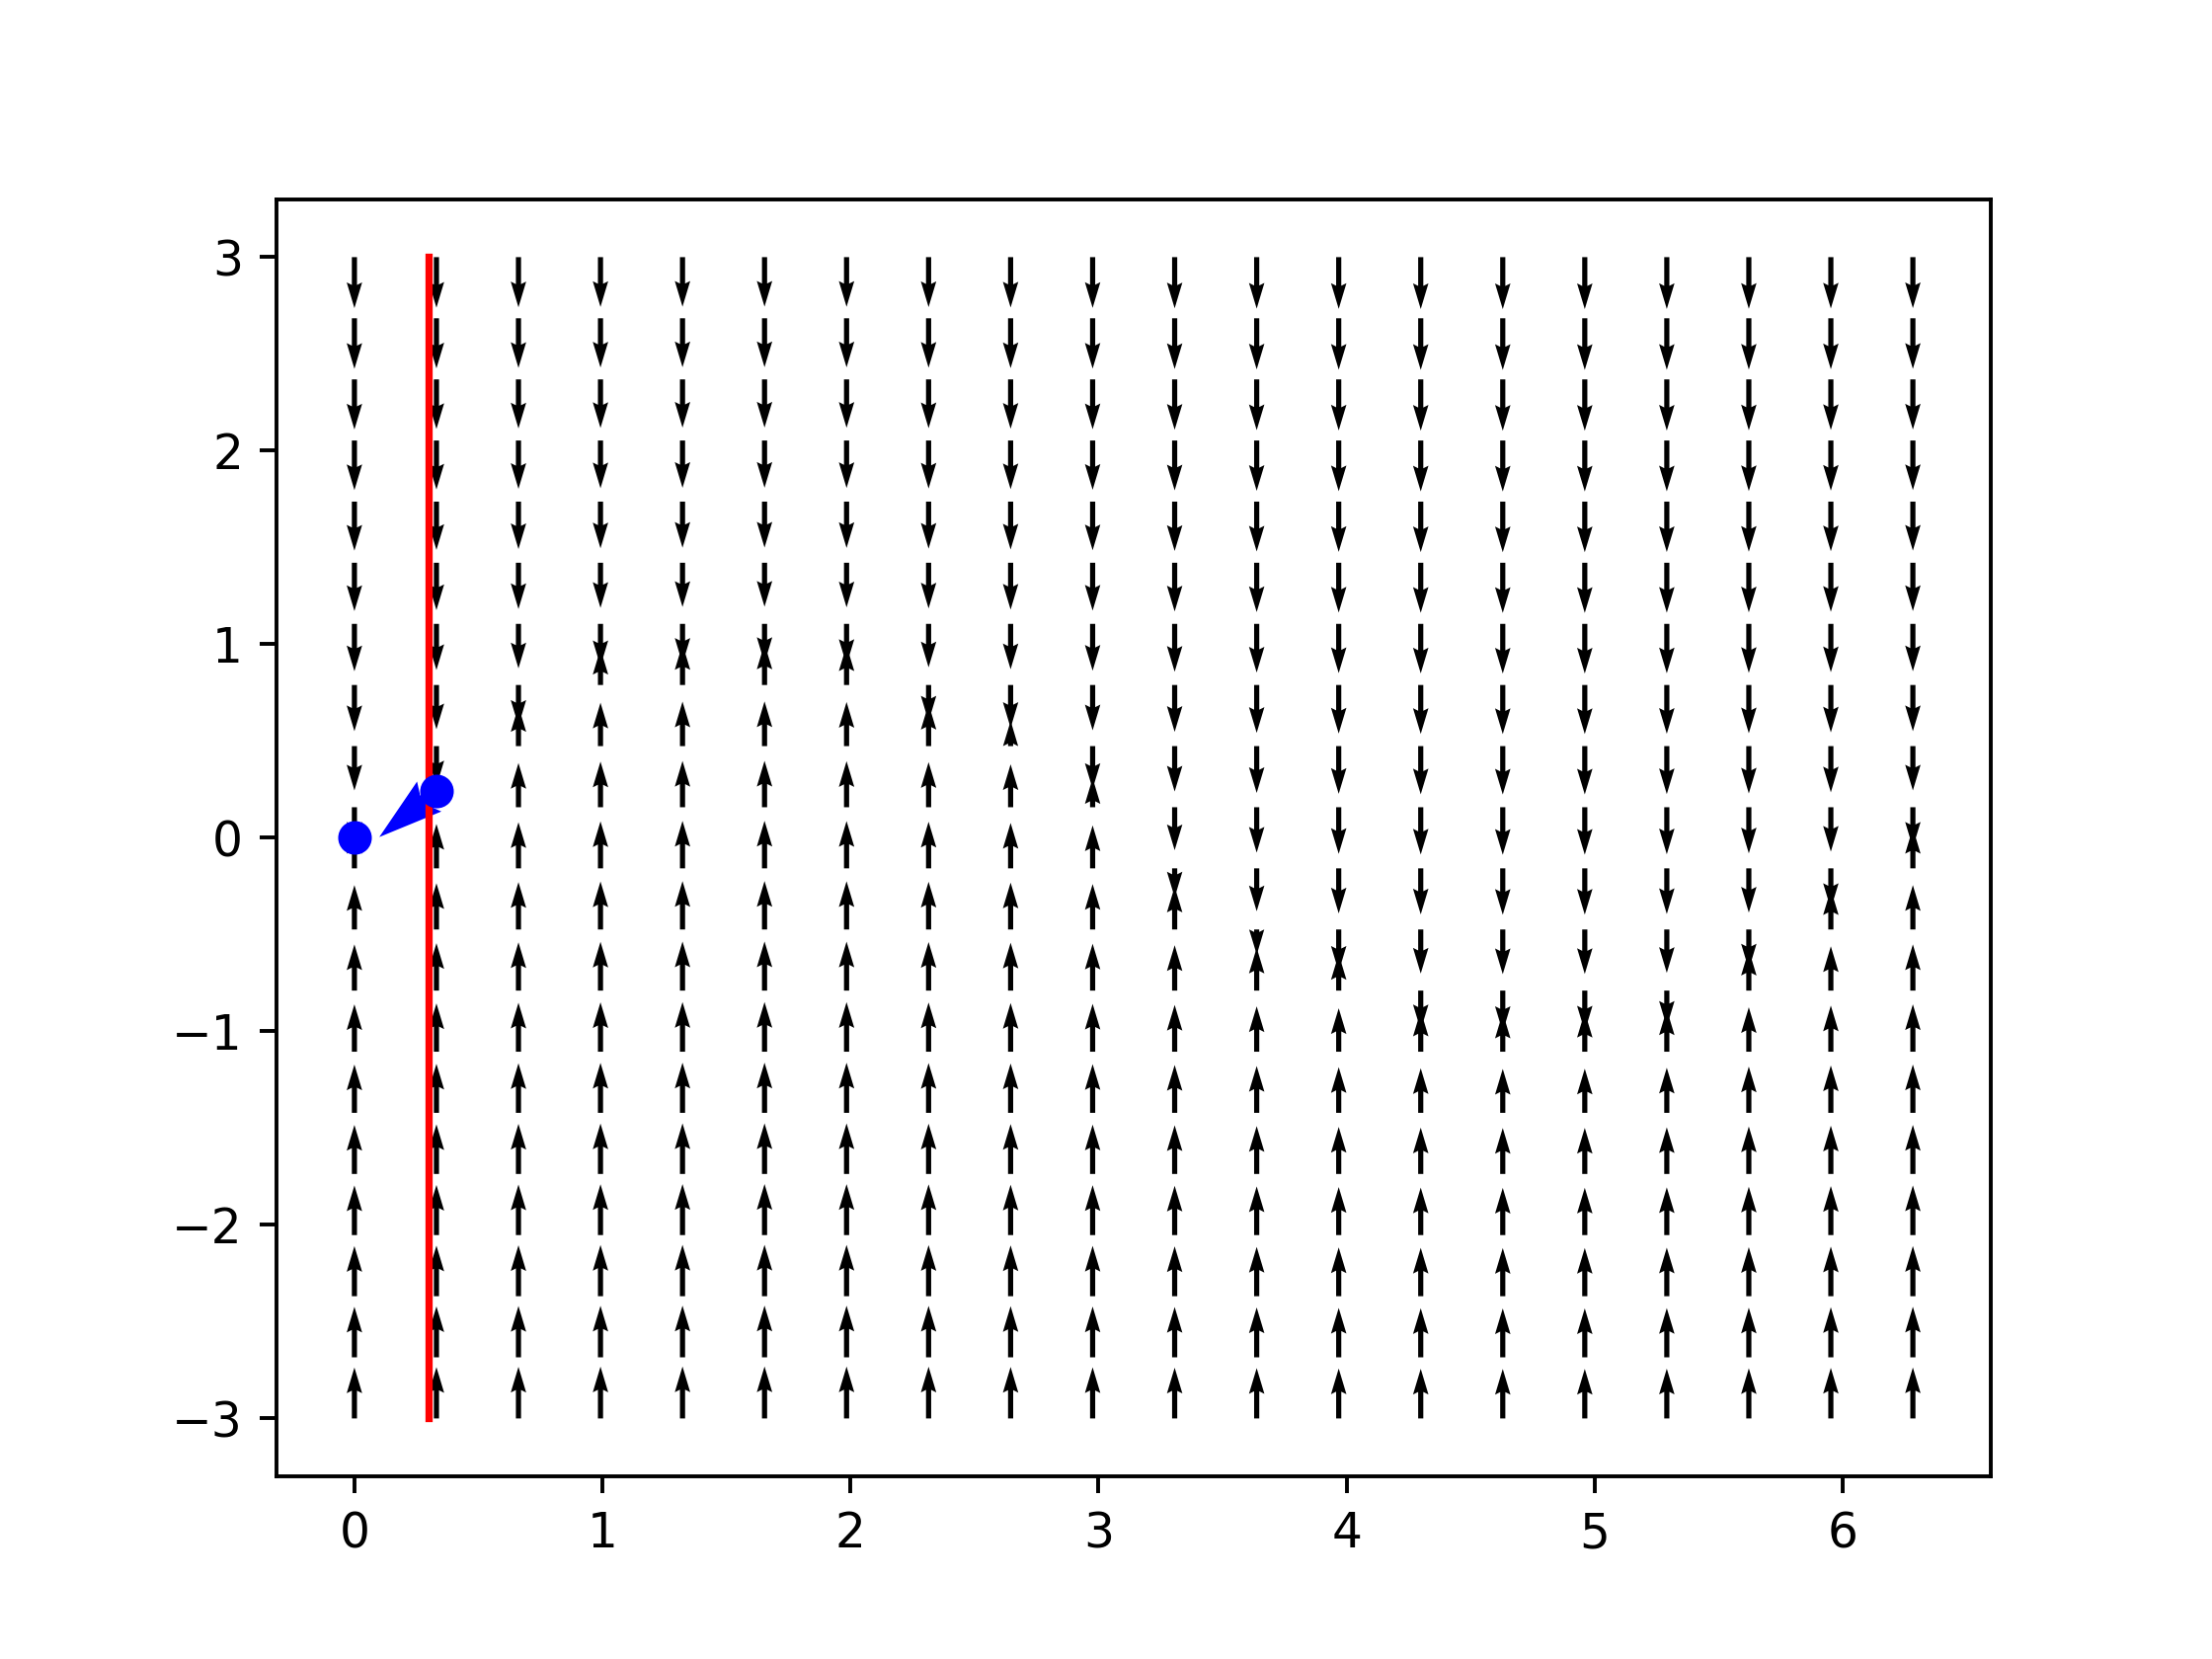

In [10]:
## Calculate y1
# Define g(z)
g = lambda z: z - y0 - dt*dydt(tspan[1], z)
# Solve g(z) = 0
y1 = scipy.optimize.fsolve(g, y0)

# Plot y1
ax.plot(tspan[1], y1, 'bo')

fig

We can also plot the negative vector at $t_1$ to show the slope at $t_1$. 

<IPython.core.display.Javascript object>


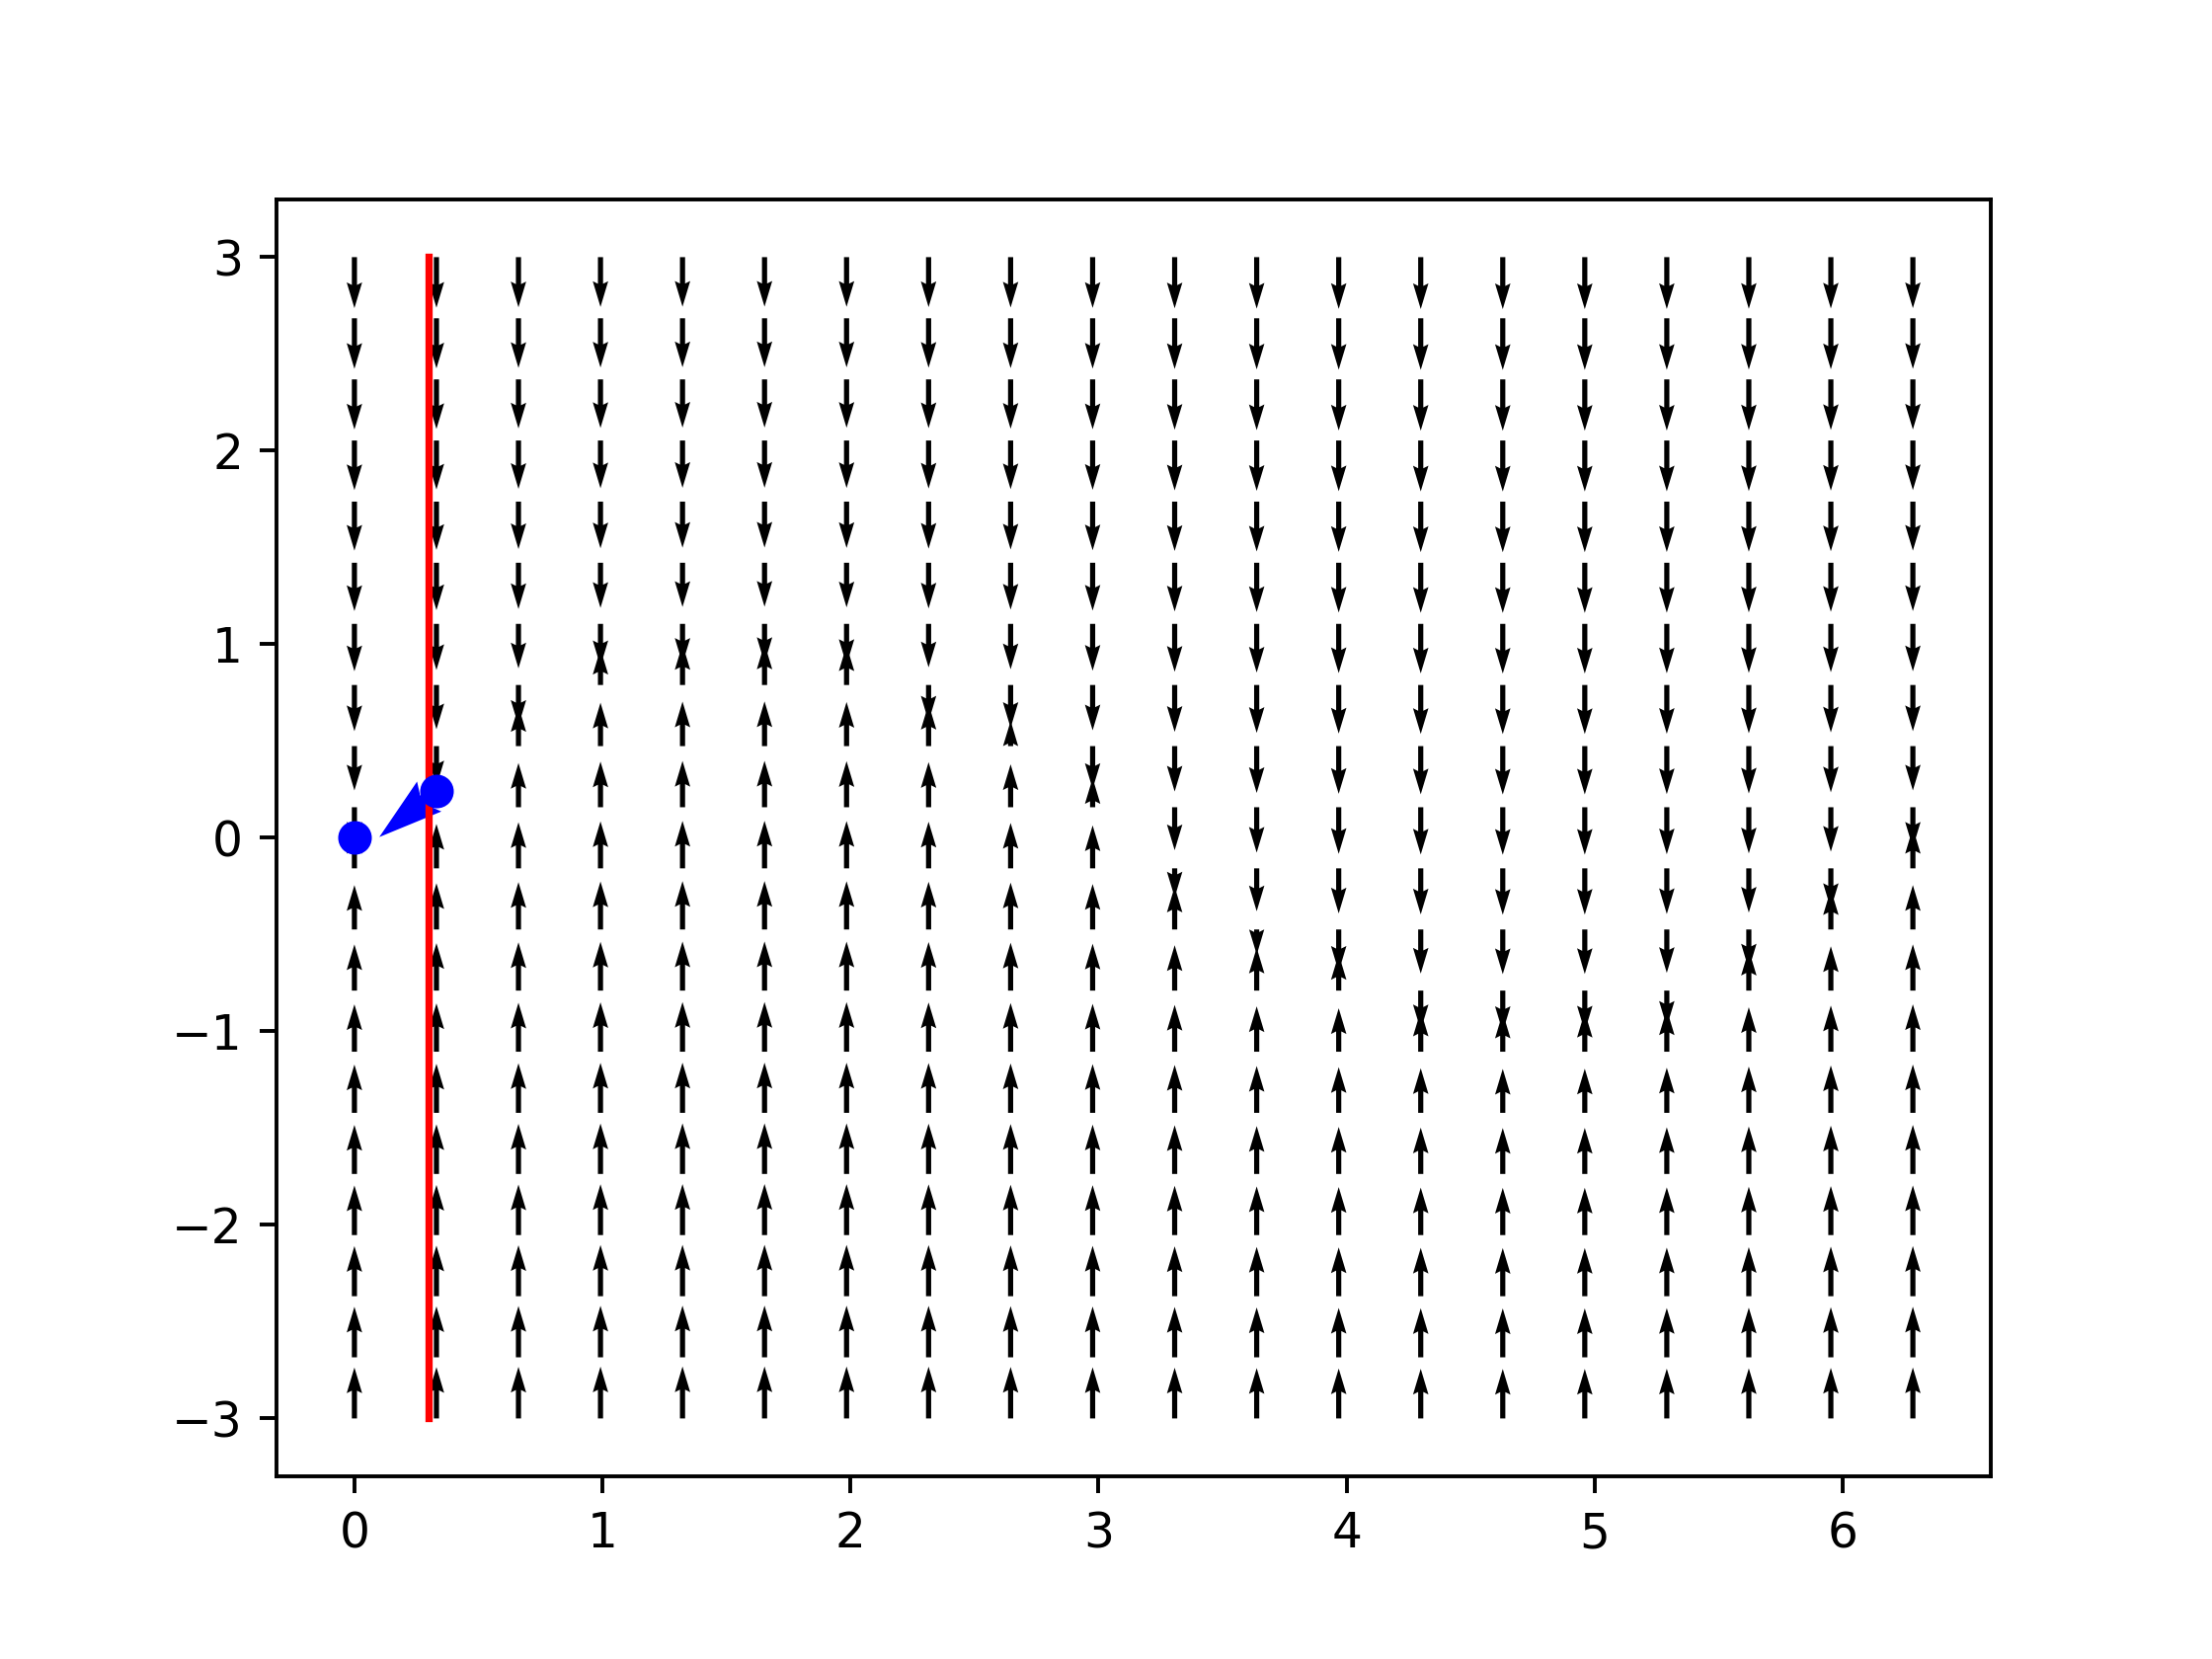

In [11]:
# Calculate the negative slope at (t1, y1)
slope = -dydt(tspan[1], y1)

# Plot that as an arrow using quiver
ax.quiver(tspan[1], y1, -1, slope, color='blue', scale=30)

fig

This is a vector that is not plotted in our quiver plot: that's how narrow the transition region is between vertical and non-vertical vectors. 

#### Recap:
When using an explicit method, **very small step sizes are needed to solve stiff problems.** The method *will* work with a very small step size, but sometimes it can become prohibitively small, meaning the method will just take too long to converge. That is why we saw `solve_ivp` taking so long to solve; because `solve_ivp` will decrease the step size automatically to make the error small, it has to choose a very very small $\Delta t$, meaning that it is taking *more steps in the for loop*, which takes more time!

So, how do you identify stiff problems? When would you know which method to use?
- Usually you would start with using `solve_ivp` because it's highly accurate. If it's taking a long time, your ODE is probably stiff. You may want to use `method = BDF`. 
- You can also recognize stiff ODEs from the vector field itself. **If there is a small region where the vector field changes rapidly, then the problem is likely stiff.** (That's what we see here, the vector field goes from pointing straight up to horizontal in a narrow region).

Finally, just to reiterate:
- When you have a stiff problem, **use an implicit method.**
- Otherwise, use an **explicit method** because they are usually faster!

There's more **optional** material on stability at the end of this notebook. We will not talk about it in class, but if you are curious you can look over this. We will now move on from stability to begin talking about *linear algebra.*

### Stability Material below is optional and we will not cover it in class. 

### Stability
Remember that stability has to do with how our solution behaves if we make the final time $T$ very large.  This turns out to be a very complicated concept, and it often depends on the details of our differential equation, so we will only look at one of the simplest versions of stability.  In particular, we will only talk about stability in terms of a very simple family of differential equations: 

$\dot{x} = \lambda x$ and $x(0) = x_0$, 

where $\lambda$ is a constant.  (It turns out that when we try to solve systems of equations we will need to worry about complex values of $\lambda$, but for the moment we will just pretend that $\lambda$ is real.)  This is called a *test problem*.  

**Note:** I am trying to avoid more technical definitions of stability and some of the more complicated concepts from differential equations.  Unfortunately, this means that I am also using somewhat non-standard definitions of words like "stable" and "unstable".  If you are interested in the standard definitions, a good place to start is by looking up "A-stability".  

We already saw in the previous lecture that the true solution to the test problem is 

$x(t) = x_0e^{\lambda t}$.  

We want to know what happens to this solution (and to our approximations, but let's start with the true solution) after a very long time.  In this case, there are only two possibilities.  If $\lambda > 0$, then $x$ goes off to $\pm\infty$ as time goes on.  We will call the true solution "unstable" in this case.  If $\lambda < 0$, then $x$ goes to zero as time goes on.  We will call the true solution "stable" in this case.  (Technically, there is a third possibility.  If $\lambda = 0$, then $x(t)$ stays constant forever.  However, this is a pretty degenerate case, so we won't worry about it here.)

Ideally, we want our numerical methods to capture this stable/unstable behavior.  That is, if we solve this initial value problem using something like the forward or backward Euler method, we want our approximation to go to infinity when $\lambda > 0$ and to go to zero when $\lambda < 0$.  Unfortunately, it turns out that this is not actually possible.  We will always have some tradeoff where our approximation goes to infinity even though the true solution does not, or vice versa.  

## Stability of Forward Euler
Let's look at what happens when we apply the forward Euler method to the test problem.  If we already know all of the $x$ values up to $x_k$, then we can find the next $x$ value using the equation 

$x_{k+1} = x_k + \Delta t f(t_k, x_k)$.  

In this case, $f(t, x) = \lambda x$, so we have 

$x_{k+1} = x_k + \Delta t \lambda x_k = (1 + \Delta t\lambda)x_k$.  

If we use this formula with $k = 0$, then we find 

$x_1 = (1 + \Delta t\lambda)x_0$.  

Likewise, if we use $k = 1$ then we find 

$x_2 = (1 + \Delta t\lambda)x_1 = (1 + \Delta t\lambda)^2x_0$.  

It is easy to check that if we repeat this process $k$ times we will get the general formula 

$x_k = (1 + \Delta t\lambda)^kx_0$.  

From this equation we can see that our approximations $x_k$ go to $\pm\infty$ if $|1 + \Delta t\lambda| > 1$.  If this is the case then we say that forward Euler is "unstable".  Likewise, if $|1 + \Delta t\lambda| < 1$ then our approximations $x_k$ go to zero and we say that forward Euler is "stable".  

It is very important to notice that this is not the same as the stability of the true solution.  The true solution is stable whenever $\lambda$ is negative, but it is easy to come up with combinations of $\Delta t$ and $\lambda$ where $\lambda$ is negative, but forward Euler is unstable.  For instance, if $\Delta t = 1$ and $\lambda = -10$, then $|1 + \Delta t\lambda| = 9 > 1$, so forward Euler is unstable even though the true solution is stable.  However, it is easy to check that if $\lambda$ is positive then $|1 + \Delta t\lambda| > 1$, so if the true solution is unstable then so is the forward Euler approximation.  

We therefore know that the forward Euler solution is unstable whenever the true solution is unstable, but sometimes forward Euler is not stable even though the true solution is stable.  In particular, if $-2 < \Delta t\lambda < 0$, then the forward Euler approximation will be stable, but if $\Delta t\lambda < -2$ then the forward Euler approximation will be unstable (even though the true solution is actually stable).  

Notice that, for any fixed value of $\lambda$, if we choose $\Delta t$ small enough then the stability of our approximation will always match the stability of the true solution, but if $\lambda$ is negative then we might need a very small $\Delta t$ to make sure that forward Euler is stable.  

## Stability of Backward Euler
Similarly, we can look at what happens when we apply the backward Euler method to the test problem.  If we already know all of the $x$ values up to $x_k$, then we can find the next $x$ value using the equation 

$x_{k+1} = x_k + \Delta t f(t_{k+1}, x_{k+1})$.  

In this case, $f(t, x) = \lambda x$, so we have 

$x_{k+1} = x_k + \Delta t\lambda x_{k+1}$.  

This is an implicit equation, but it is very easy to solve for $x_{k+1}$.  We get 

$x_{k+1} = \frac{1}{1 - \Delta t\lambda}x_k$.  

If we use this formula with $k = 0$, we find that 

$x_1 = \frac{1}{1 - \Delta t\lambda}x_0$.  

Likewise, if we use $k = 1$ then we find 

$x_2 = \frac{1}{1 - \Delta t\lambda}x_1 = \left(\frac{1}{1 - \Delta t\lambda}\right)^2x_0$.  

It is easy to check that if we repeat this process $k$ times we will get the general formula 

$x_k = \left(\frac{1}{1 - \Delta t\lambda}\right)^{k}x_0$.  

From this equation we can see that our approximations $x_k$ go to $\pm\infty$ if $|1/(1 - \Delta t\lambda)| > 1$.  If this is the case then we say that backward Euler is "unstable".  Likewise, if $|1/(1 - \Delta t\lambda)| < 1$ then our approximations $x_k$ go to zero and we say that backward Euler is "stable".  

Just like with forward Euler, it is very important to notice that this is not the same as the stability of the true solution (or as the rule for forward Euler).  In particular, if $\lambda$ is positive then the true solution is always unstable, but it is easy to come up with combinations of $\Delta t$ and $\lambda$ where $\lambda$ is positive but backward Euler is stable.  For example, if $\Delta t = 1$ and $\lambda = 10$, then $|1/(1 - \Delta t\lambda)| = 1/9 < 1$, so backward Euler is stable even though the true solution is unstable.  

We therefore know that the backward Euler solution is stable whenever the true solution is stable, but sometimes backward Euler is still stable even though the true solution is unstable.  In particular, the backward Euler approximation is only unstable when $0 < \Delta t\lambda < 2$.  If $\Delta t\lambda > 2$ then backward Euler will be stable (even though the true solution is actually unstable).  

For any fixed value of $\lambda$, if we choose $\Delta t$ small enough then the stability of our approximation will always match the stability of the true solution, but if $\lambda$ is positive then we might need a very small $\Delta t$ to make sure that the behavior of backward Euler matches that of the true solution.  

## Overview
We only analyzed the stability of a very limited set of differential equations (the test problems) and we only looked at two methods (forward and backward Euler), but it turns out that this analysis applies to a wide variety of problems and methods.  More complicated differential equations don't usually just go to zero as time goes on, but we are still interested in correctly capturing whatever long term behavior they have.  We will say that the solution to a differential equation is "stable" if it does *not* go to infinity as time goes on.  (This is not a very good definition, but we would have to spend several classes on differential equations theory in order to make a substantially better one.)  It turns out that explicit approximation methods are prone to going to infinity even when the true solution is stable, while implicit methods are good at capturing stable behavior.  This means that explicit methods often need a fairly small time step $\Delta t$ in order to correctly capture long-term stable behavior.  Implicit methods, on the other hand, can correctly capture long-term stable behavior even with a fairly large time step.  

In real world applications, solutions rarely go to infinity.  For example, if we are modeling the population of a species, there are physical limits (like space or resource requirements) that keep this population from becoming infinitely large.  Because of this, we typically expect the true solution of our initial value problems to be stable.  This means that implicit methods like backward Euler can usually correctly capture long-term behavior with a larger time step than explicit methods like forward Euler.  We therefore say that implicit methods like backward Euler have "better stability properties" or are "more stable" than explicit methods.  